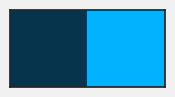

In [7]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import plotly.offline as py 
py.init_notebook_mode(connected=True)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots 
colors = ['#06344d','#00b2ff']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'#f1f1f1', 'figure.facecolor':'#f1f1f1'})
sns.palplot(colors)

# scaling and train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# creating a model
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report

import warnings 
warnings.filterwarnings('ignore')

In [8]:
df=pd.read_csv('AutoInsurance.csv')

In [9]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [10]:
## Renaming Customer Lifetime Value as CLV

df.rename(columns={'Customer Lifetime Value':'CLV'},inplace=True)

In [11]:
df.head()

,Customer,State,CLV,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# Check for missing columns and values


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   CLV                            9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

We can see that:
The dataframe has a total of 9134 rows and 24 columns.


In [13]:
df.dropna(axis=0, how='any', inplace=True)

# Numerical Variables

In [14]:
numerical_cols = df.select_dtypes(include=["int64","float64"])

In [15]:
numerical_cols.columns

Index(['CLV', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Total Claim Amount'],
      dtype='object')

# Categorical variables

In [16]:
cat_cols = df.select_dtypes(include="object")

In [17]:
cat_cols.drop("Effective To Date",axis=1,inplace=True)
cat_cols.drop("Customer",axis=1,inplace=True)

# Statistical summary

In [18]:
numerical_cols.describe()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [19]:
cat_cols.describe()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,5,2,3,5,5,2,3,3,3,9,4,4,6,3
top,California,No,Basic,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,3150,7826,5568,2748,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


In [20]:
for col in cat_cols:
    print(f'''Value count {col}:''')
    print(cat_cols[col].value_counts())
    print()

Value count State:
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64

Value count Response:
No     7826
Yes    1308
Name: Response, dtype: int64

Value count Coverage:
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64

Value count Education:
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64

Value count EmploymentStatus:
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64

Value count Gender:
F    4658
M    4476
Name: Gender, dtype: int64

Value count Location Code:
Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64

Value count Marital Status:
Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64

Value c

# EDA(Exploratory Data Analysis)

# 1)Numerical Features

Univariate Analysis

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

# Fixing random state for reproducibility
np.random.seed(19680801)

a)CLV - Target variable analysis

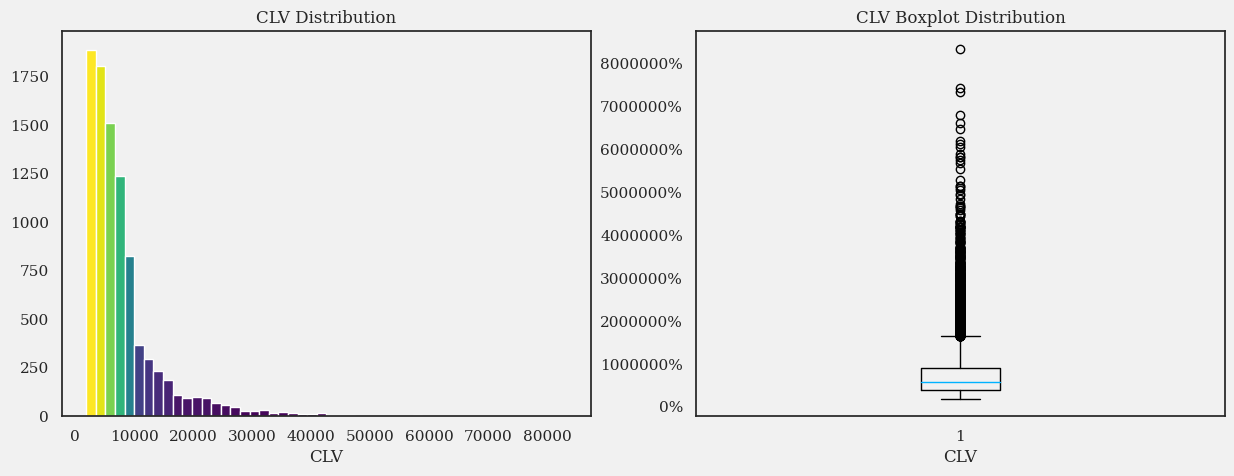

In [23]:
fig, axs = plt.subplots(1, 2,figsize=(15,5))

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(df['CLV'], bins=50)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs[1].boxplot(df['CLV'])
axs[0].set(xlabel='CLV', ylabel='', title='CLV Distribution')
axs[1].set(xlabel='CLV', ylabel='', title='CLV Boxplot Distribution')
# Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

In [24]:
df["CLV"].skew()

3.0322802599299847

From the distribution and box plot we can infer that CLV is highly right skewed. There are lot of outliers in our dependent variable but we cant treat them directly because they are influential points.

b)Income

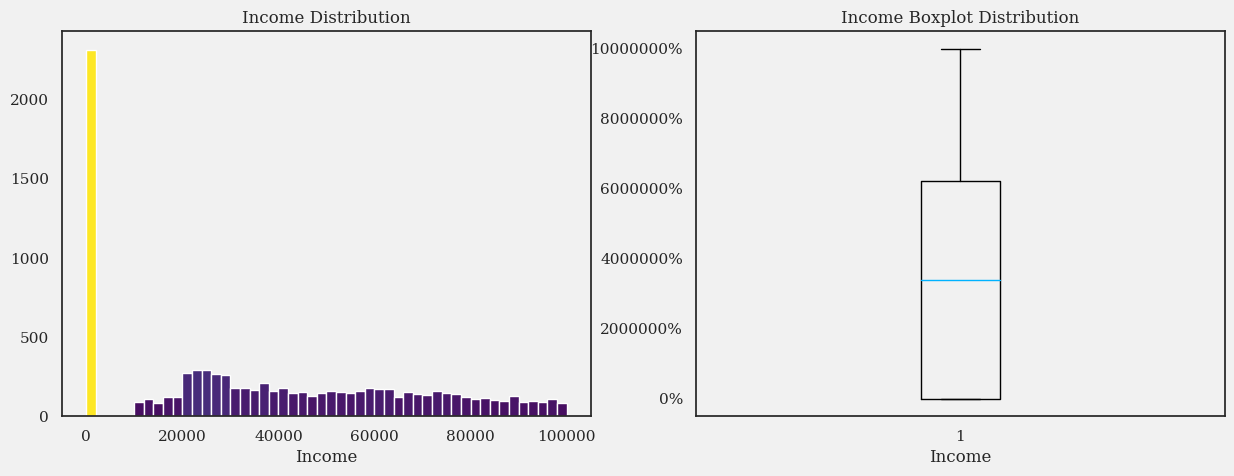

In [25]:
fig, axs = plt.subplots(1, 2,figsize=(15,5))

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(df['Income'], bins=50)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs[1].boxplot(df['Income'])
axs[0].set(xlabel='Income', ylabel='', title='Income Distribution')
axs[1].set(xlabel='Income', ylabel='', title='Income Boxplot Distribution')
# Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

3.Monthly Premium Auto

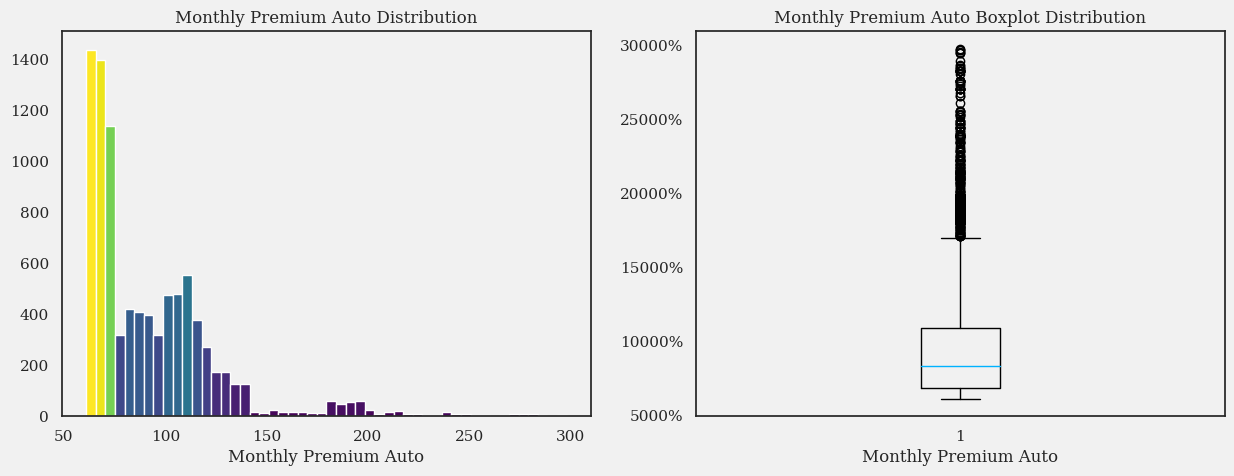

In [26]:
fig, axs = plt.subplots(1, 2,figsize=(15,5))

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(df["Monthly Premium Auto"], bins=50)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs[1].boxplot(df["Monthly Premium Auto"])
axs[0].set(xlabel="Monthly Premium Auto", ylabel='', title='Monthly Premium Auto Distribution')
axs[1].set(xlabel="Monthly Premium Auto", ylabel='', title='Monthly Premium Auto Boxplot Distribution')
# Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

From the distribution and box plot we can infer that Monthly Premium Auto is highly right skewed. There are lot of outliers in our independent variable but we cant treat them directly because they are influential points.

4.Months Since Last Claim

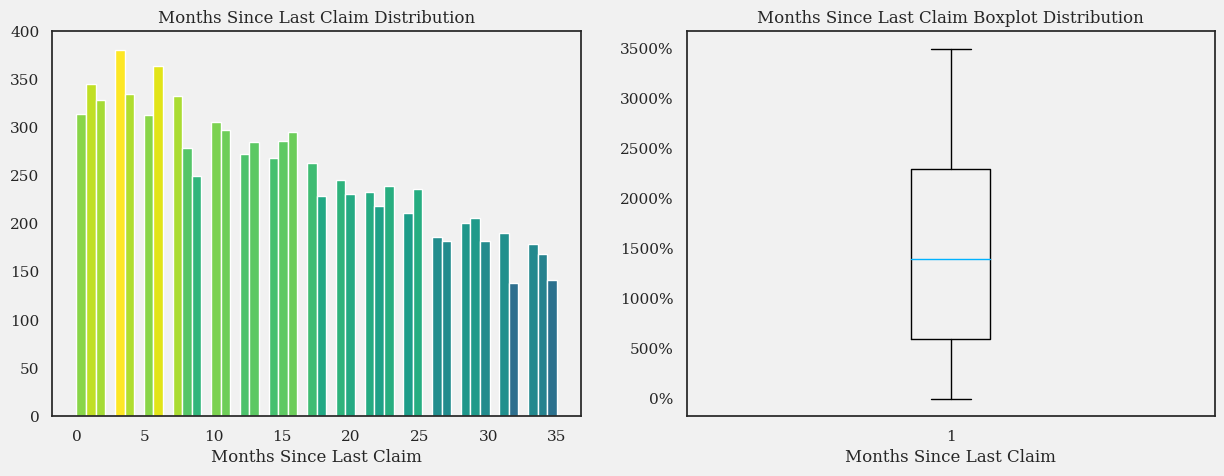

In [27]:
fig, axs = plt.subplots(1, 2,figsize=(15,5))

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(df['Months Since Last Claim'], bins=50)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs[1].boxplot(df['Months Since Last Claim'])
axs[0].set(xlabel='Months Since Last Claim', ylabel='', title='Months Since Last Claim Distribution')
axs[1].set(xlabel='Months Since Last Claim', ylabel='', title='Months Since Last Claim Boxplot Distribution')
# Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

5.Months Since Policy Inception

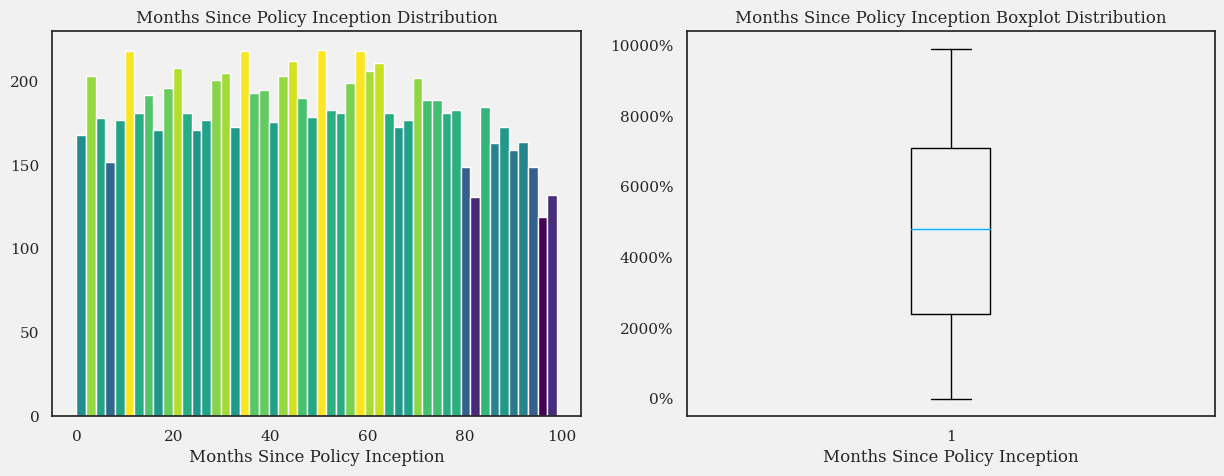

In [28]:
fig, axs = plt.subplots(1, 2,figsize=(15,5))

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(df['Months Since Policy Inception'], bins=50)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs[1].boxplot(df['Months Since Policy Inception'])
axs[0].set(xlabel='Months Since Policy Inception', ylabel='', title='Months Since Policy Inception Distribution')
axs[1].set(xlabel='Months Since Policy Inception', ylabel='', title='Months Since Policy Inception Boxplot Distribution')
# Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

6.Total claim amount

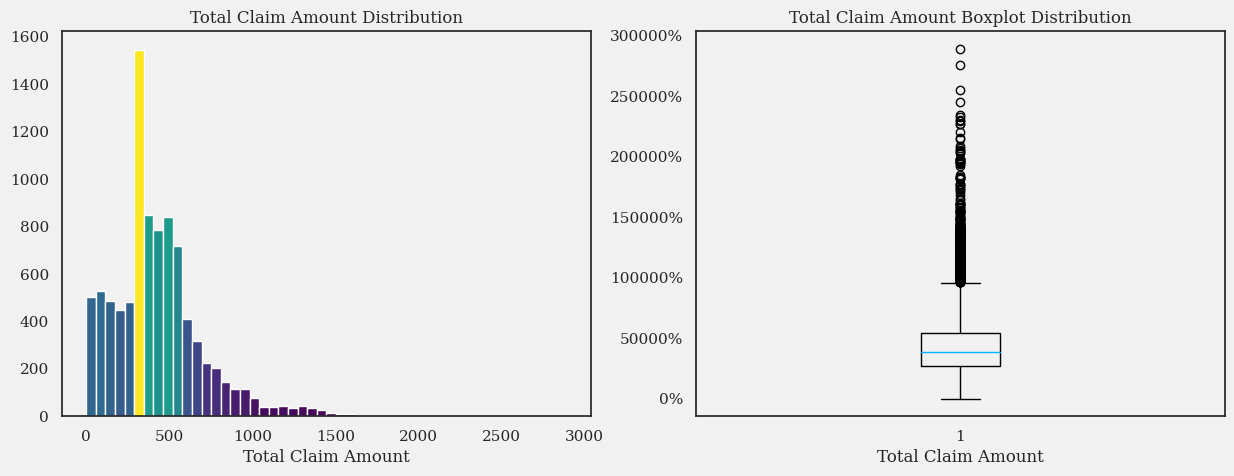

In [29]:
fig, axs = plt.subplots(1, 2,figsize=(15,5))

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(df['Total Claim Amount'], bins=50)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs[1].boxplot(df['Total Claim Amount'])
axs[0].set(xlabel='Total Claim Amount', ylabel='', title='Total Claim Amount Distribution')
axs[1].set(xlabel='Total Claim Amount', ylabel='', title='Total Claim Amount Boxplot Distribution')
# Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

There seems to be an abnormal distribution, the distribution is skew right, one value looks very high. The Boxplot show there are many outlier.

# B. Bevariate Analysis

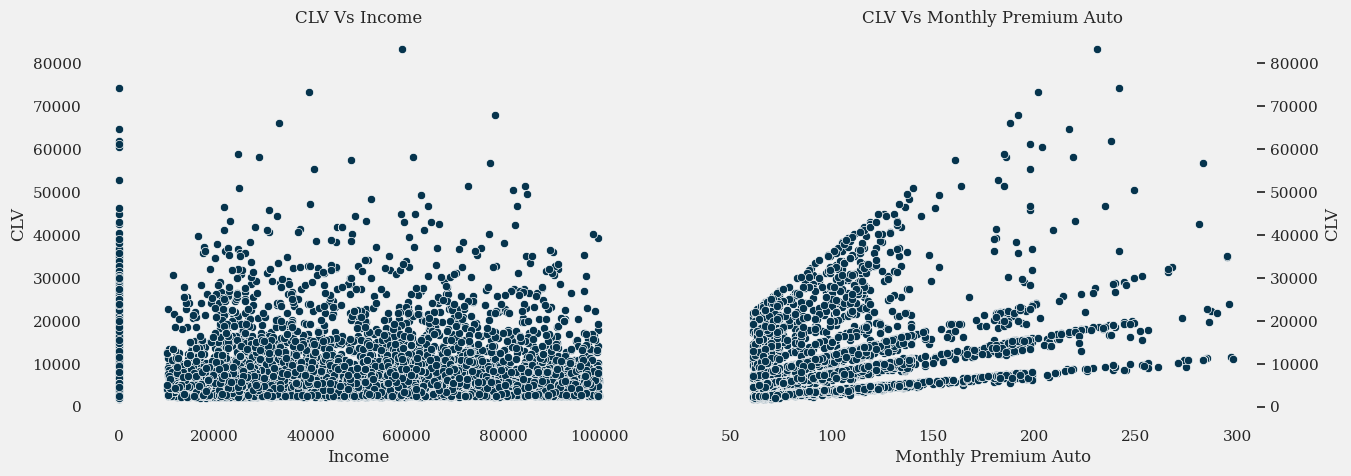

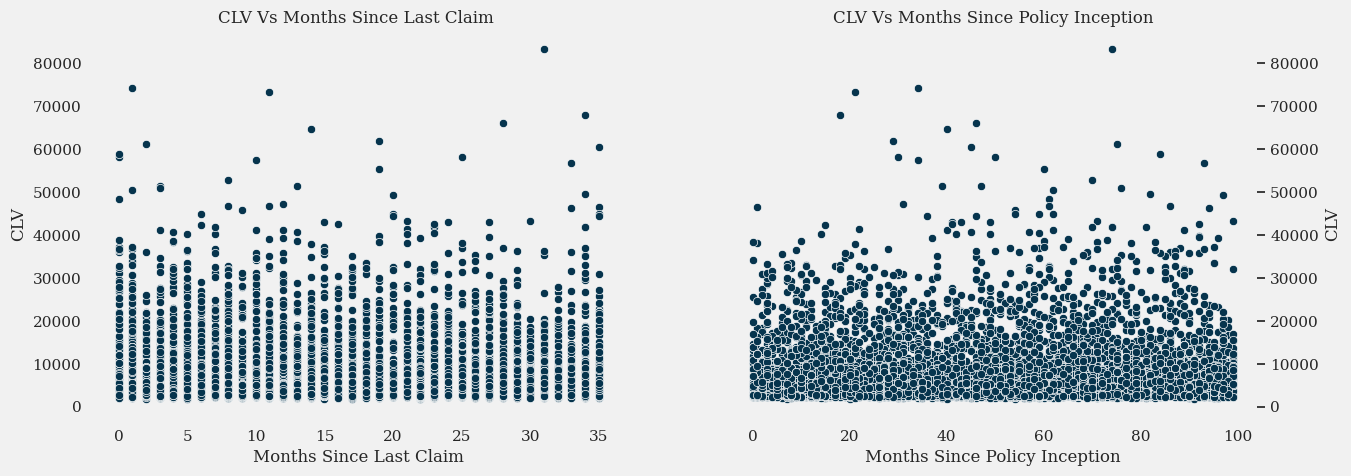

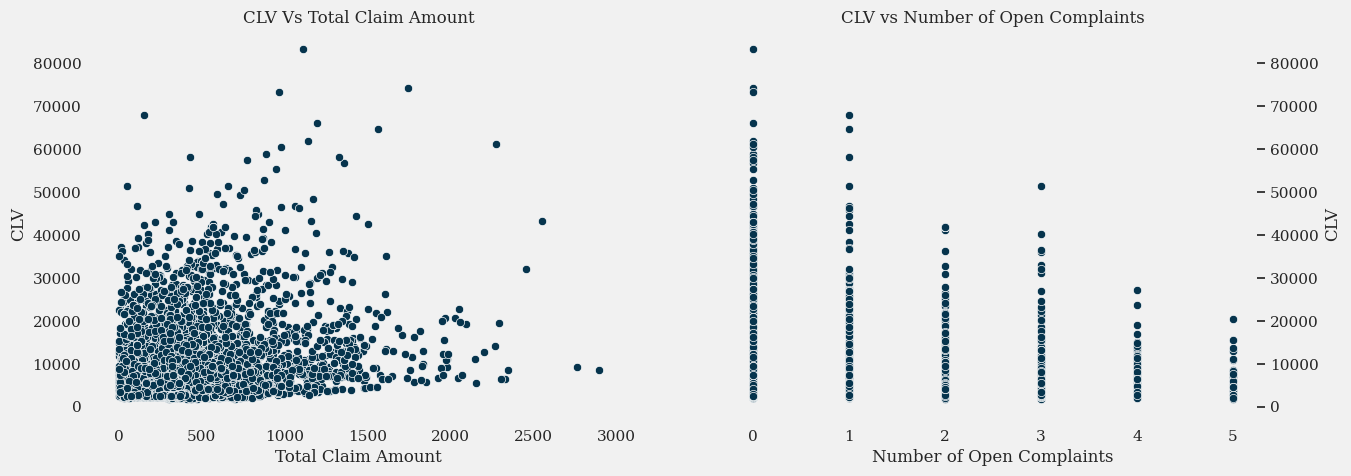

In [30]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.scatterplot(x="Income",y='CLV', data=df, ax=axes[0])
sns.scatterplot(x="Monthly Premium Auto",y='CLV', data=df, ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Income', ylabel='CLV', title='CLV Vs Income')
axes[1].set(xlabel='Monthly Premium Auto', ylabel='CLV', title='CLV Vs Monthly Premium Auto')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.scatterplot(x="Months Since Last Claim",y='CLV', data=df, ax=axes[0])
sns.scatterplot(x="Months Since Policy Inception",y='CLV', data=df, ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Months Since Last Claim', ylabel='CLV', title='CLV Vs Months Since Last Claim ')
axes[1].set(xlabel='Months Since Policy Inception', ylabel='CLV', title='CLV Vs Months Since Policy Inception')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.scatterplot(x="Total Claim Amount",y='CLV', data=df, ax=axes[0])
sns.scatterplot(x="Number of Open Complaints",y='CLV', data=df, ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Total Claim Amount', ylabel='CLV', title='CLV Vs Total Claim Amount')
axes[1].set(xlabel='Number of Open Complaints', ylabel='CLV', title='CLV vs Number of Open Complaints')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

Only Total Claim Amount and Monthly Premium Auto appear to have a linear relationship

# Categorical variables

1.State,Response,Coverage,Education,EmploymentStatus,Policy Type

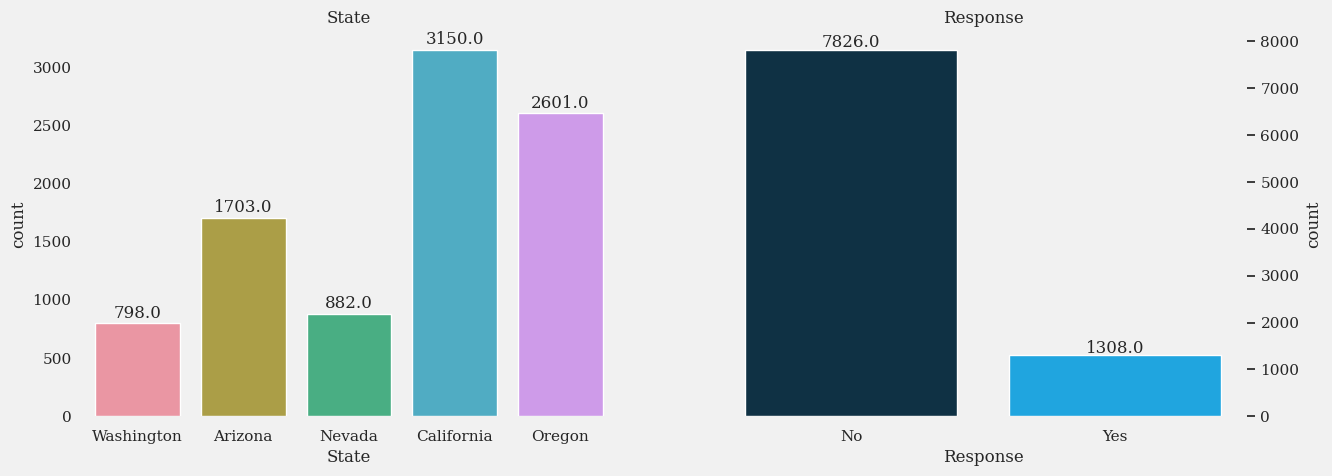

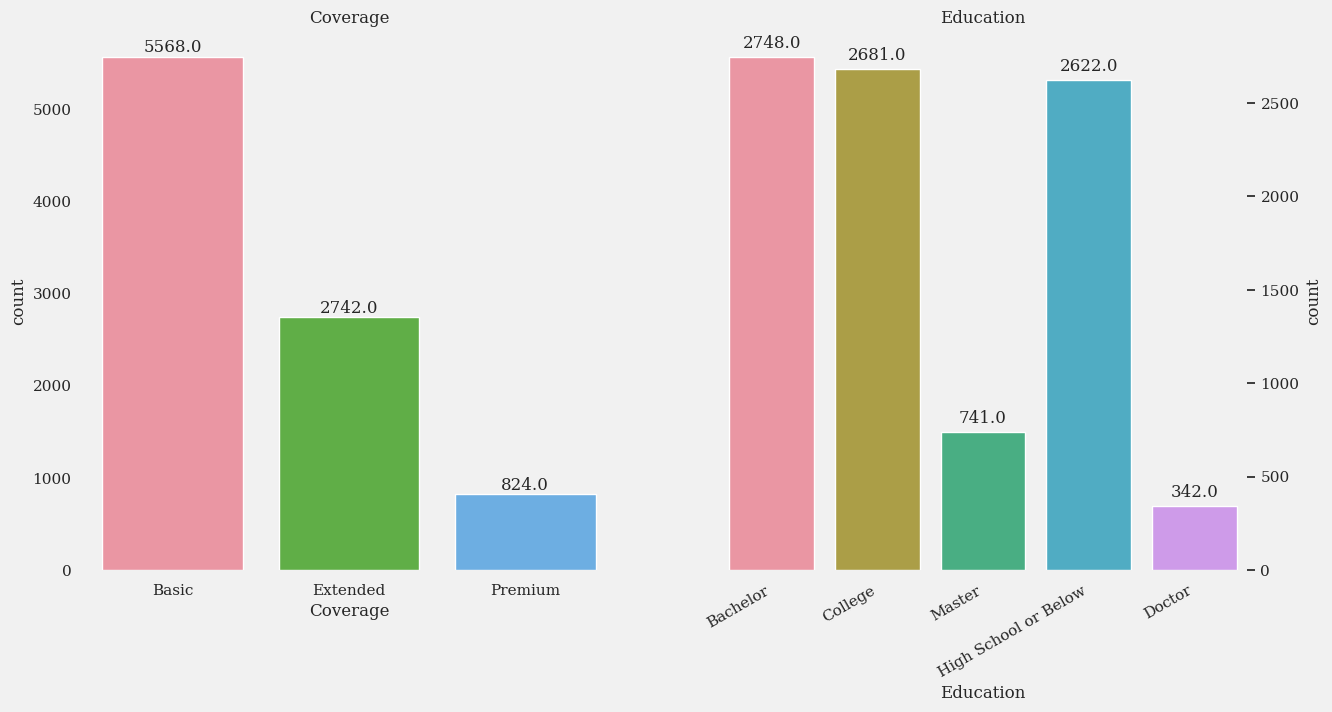

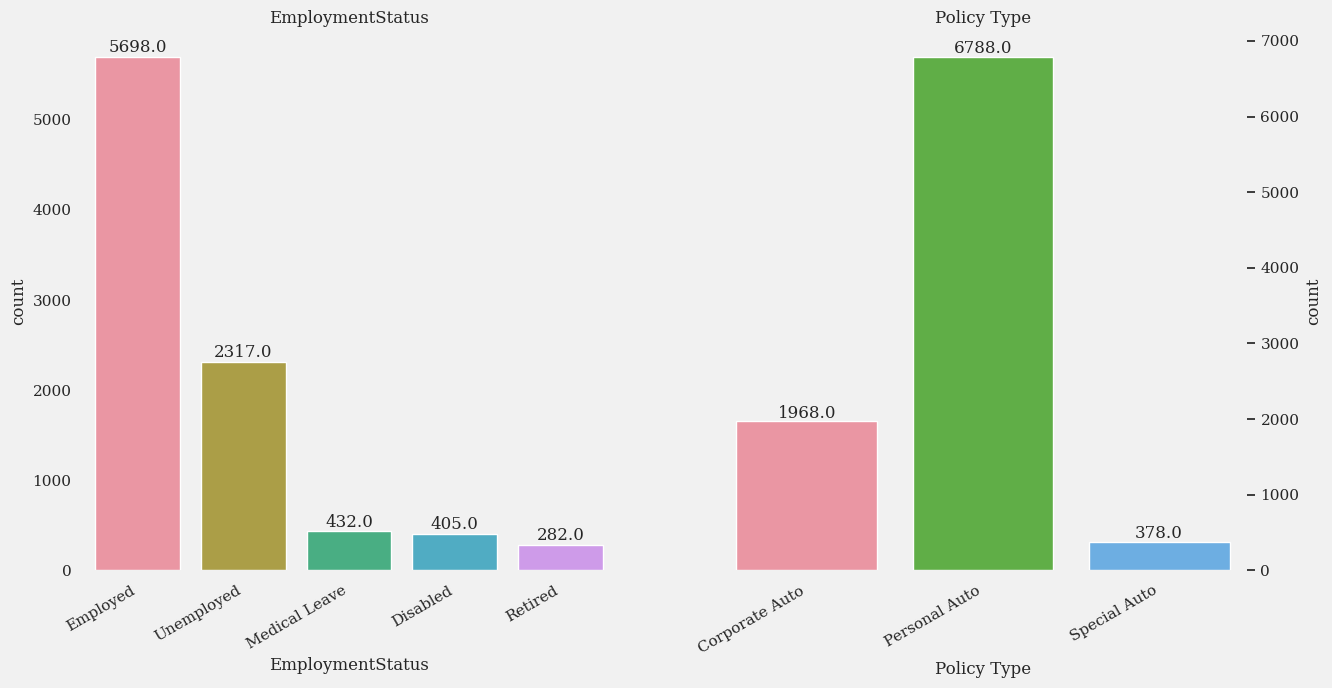

In [31]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
p1=sns.countplot(x ='State', data = df, ax=axes[0])
 
for p in p1.patches:
    height = p.get_height()
    p1.text(p.get_x()+p.get_width()/2,height + 50, height,ha='center')
p2=sns.countplot(x='Response',data=df, ax=axes[1])
for p in p2.patches:
    height = p.get_height()
    p2.text(p.get_x()+p.get_width()/2,height + 50, height,ha='center')
sns.despine(bottom=True, left=True)
axes[0].set(title='State')
axes[1].set(title='Response')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

f, axes = plt.subplots(1, 2,figsize=(15,7))
p1=sns.countplot(x='Coverage',data=df, ax=axes[0])
for p in p1.patches:
    height = p.get_height()
    p1.text(p.get_x()+p.get_width()/2,height + 50, height,ha='center')
p2=sns.countplot(x ='Education',data=df,ax=axes[1])
for p in p2.patches:
    height = p.get_height()
    p2.text(p.get_x()+p.get_width()/2,height + 50, height,ha='center')
sns.despine(bottom=True, left=True)
axes[0].set(title='Coverage')
axes[1].set(title='Education')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
for label in axes[1].get_xmajorticklabels() + axes[1].get_xmajorticklabels():
    label.set_rotation(30)
    label.set_horizontalalignment("right")

f, axes = plt.subplots(1, 2,figsize=(15,7))
p1=sns.countplot(x= 'EmploymentStatus',data =df, ax=axes[0])
for p in p1.patches:
    height = p.get_height()
    p1.text(p.get_x()+p.get_width()/2,height + 50, height,ha='center')
p2=sns.countplot(x='Policy Type',data=df, ax=axes[1])
for p in p2.patches:
    height = p.get_height()
    p2.text(p.get_x()+p.get_width()/2,height + 50, height,ha='center')
sns.despine(bottom=True, left=True)
axes[0].set(title='EmploymentStatus')
axes[1].set(title='Policy Type')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
for label in axes[0].get_xmajorticklabels() + axes[1].get_xmajorticklabels():
    label.set_rotation(30)
    label.set_horizontalalignment("right")

1)The number of customers who do not respond is higher

2)Customers are predominantly from California and Aregon

3)Basic Coverage, Employed, Personal Auto are the Highest Number

4)The number of Bachelor, College, and high school or bellows looks not too much different which is higher than master and doctor

In [32]:
df["EmploymentStatus"].value_counts(normalize=True)*100

Employed         62.382308
Unemployed       25.366762
Medical Leave     4.729582
Disabled          4.433983
Retired           3.087366
Name: EmploymentStatus, dtype: float64

Around 62.38% of the customers are employed

# 2. Gender,Location Code,Policy

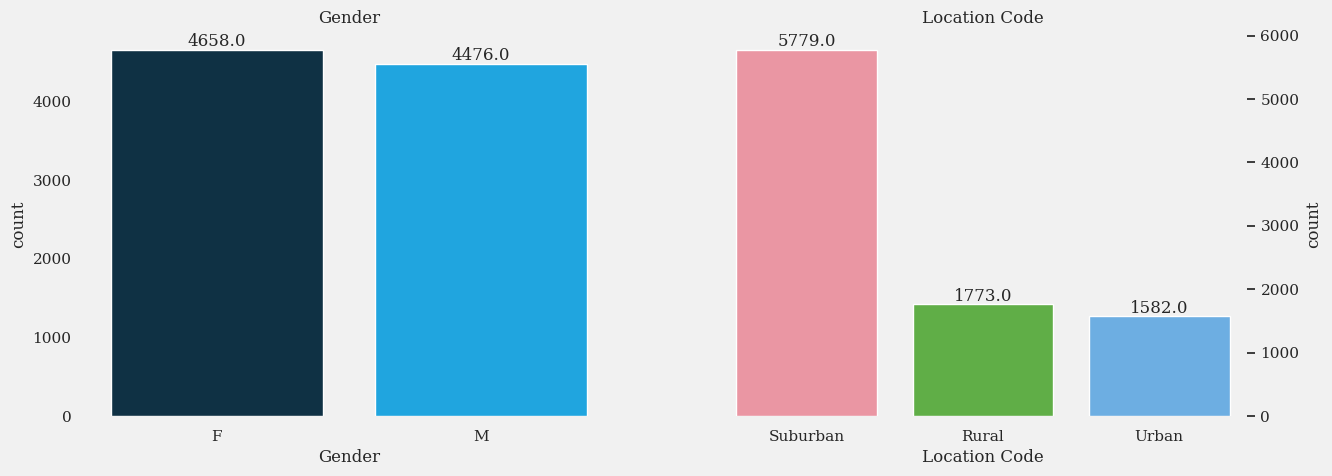

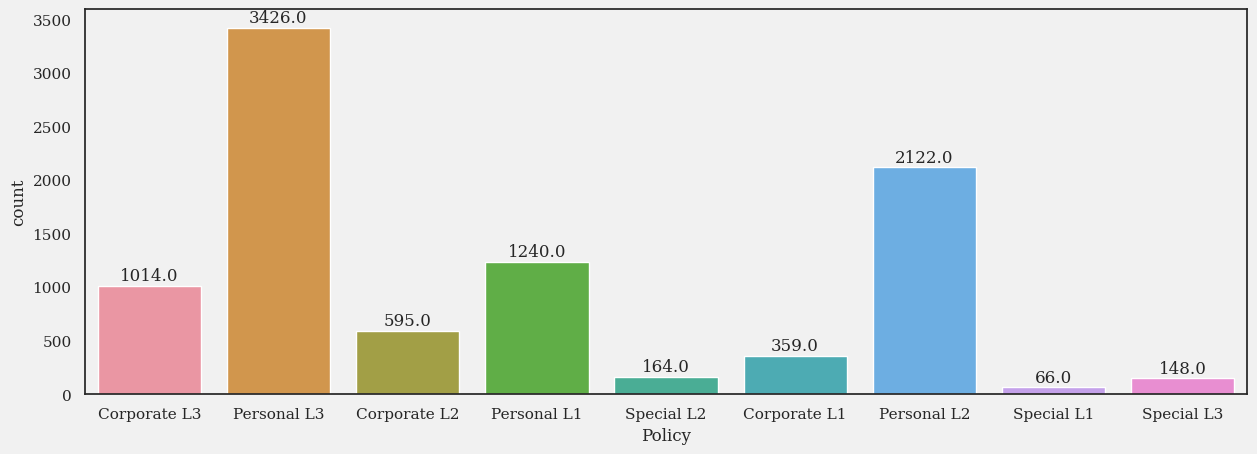

In [33]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
p1=sns.countplot(x='Gender',data=df, ax=axes[0])
for p in p1.patches:
    height = p.get_height()
    p1.text(p.get_x()+p.get_width()/2,height + 50, height,ha='center')
p2=sns.countplot(x='Location Code',data=df, ax=axes[1])
for p in p2.patches:
    height = p.get_height()
    p2.text(p.get_x()+p.get_width()/2,height + 50, height,ha='center')
sns.despine(bottom=True, left=True)
axes[0].set(title='Gender')
axes[1].set(title='Location Code')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.figure(figsize=(15,5))
p3=sns.countplot(x='Policy',data=df)
for p in p3.patches:
    height = p.get_height()
    p3.text(p.get_x()+p.get_width()/2,height + 50, height,ha='center')
    


The number of Male and Female looks not too much different and female is the highest values

Personal L3 policy subcategory has the most number of customers

# 3.Renew Offer Type,Sales Channel,Vehicle Class, Number of Complaints, Number of Policies

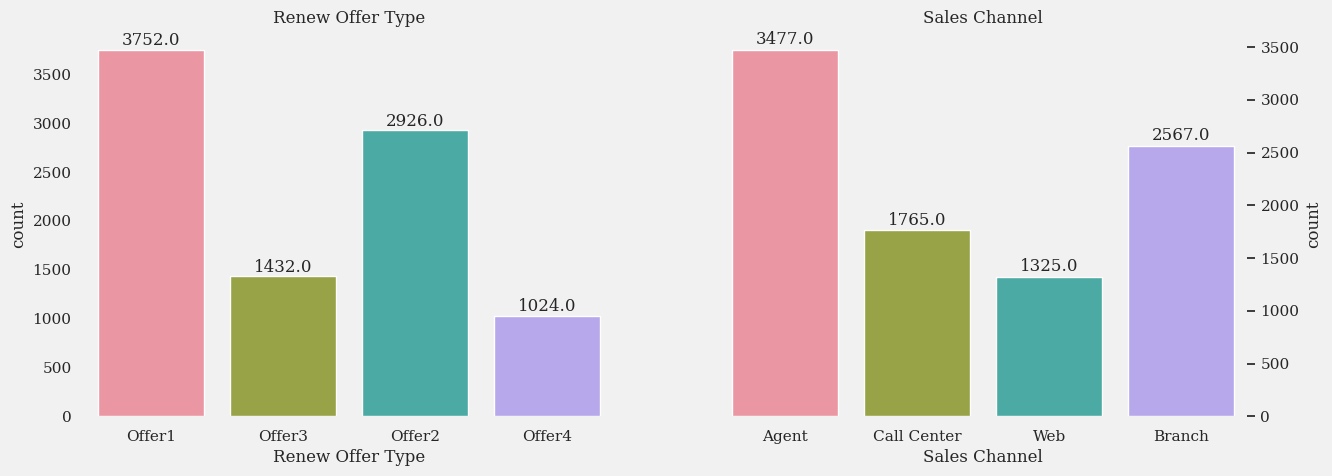

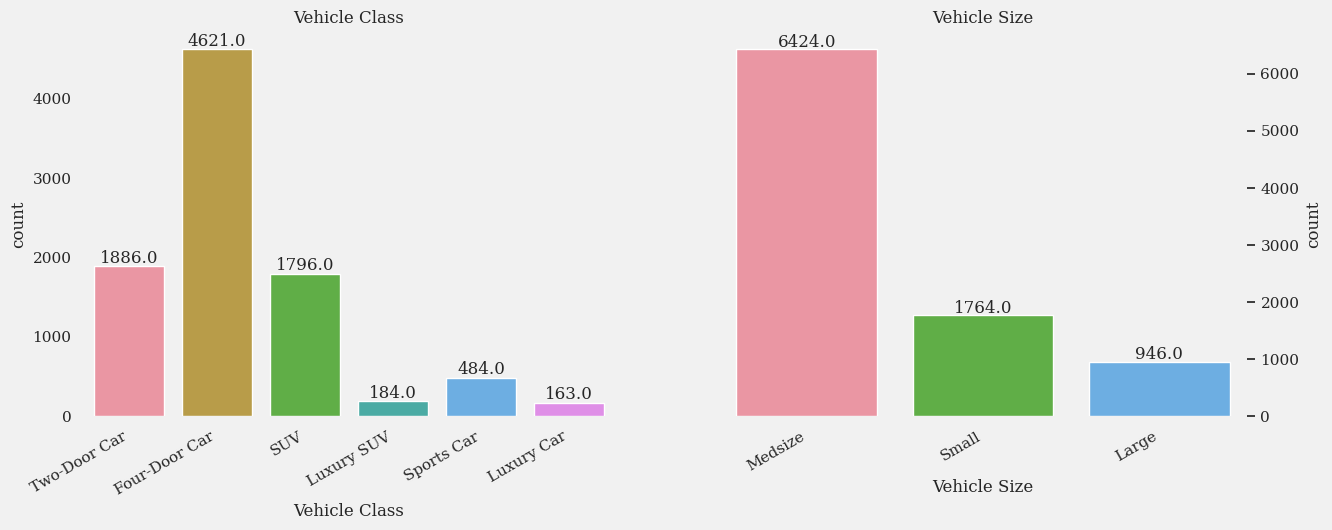

In [34]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
p1=sns.countplot(x="Renew Offer Type",data=df, ax=axes[0])
for p in p1.patches:
    height = p.get_height()
    p1.text(p.get_x()+p.get_width()/2,height + 50, height,ha='center')
p2=sns.countplot(x="Sales Channel",data=df, ax=axes[1])
for p in p2.patches:
    height = p.get_height()
    p2.text(p.get_x()+p.get_width()/2,height + 50, height,ha='center')
sns.despine(bottom=True, left=True)
axes[0].set(title='Renew Offer Type')
axes[1].set(title='Sales Channel')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

f, axes = plt.subplots(1, 2,figsize=(15,5))
p3=sns.countplot(x='Vehicle Class',data=df, ax=axes[0])
for p in p3.patches:
    height = p.get_height()
    p3.text(p.get_x()+p.get_width()/2,height + 50, height,ha='center')
p4=sns.countplot(x='Vehicle Size',data=df, ax=axes[1])
for p in p4.patches:
    height = p.get_height()
    p4.text(p.get_x()+p.get_width()/2,height + 50, height,ha='center')
sns.despine(bottom=True, left=True)
axes[0].set(title='Vehicle Class')
axes[1].set(title='Vehicle Size')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
for label in axes[0].get_xmajorticklabels() + axes[1].get_xmajorticklabels():
    label.set_rotation(30)
    label.set_horizontalalignment("right")

The first and second offers are more attractive to customers and agents are the highest sales channels

It turns out that the vehicle Class with four car doors is the highest number with medium size

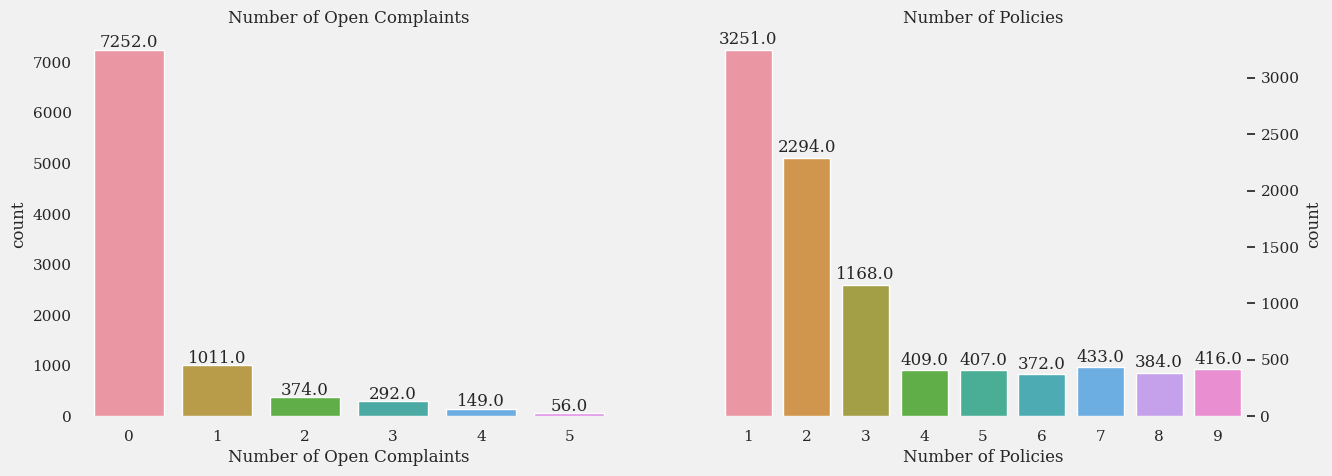

In [35]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
p1=sns.countplot(x="Number of Open Complaints",data=df, ax=axes[0])
for p in p1.patches:
    height = p.get_height()
    p1.text(p.get_x()+p.get_width()/2,height + 50, height,ha='center')
p2=sns.countplot(x='Number of Policies',data=df, ax=axes[1])
for p in p2.patches:
    height = p.get_height()
    p2.text(p.get_x()+p.get_width()/2,height + 50, height,ha='center')
sns.despine(bottom=True, left=True)
axes[0].set(title='Number of Open Complaints')
axes[1].set(title='Number of Policies')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

Category No 0 are the highest Number of Open Complaints and Category No 1 are the highest Number of Policies

# 4.Months

In [36]:
df['Effective To Date']=pd.to_datetime(df['Effective To Date'],infer_datetime_format=True)

In [37]:
df["Months"] = df["Effective To Date"].dt.month
df['Months'] = df['Months'].astype('object')

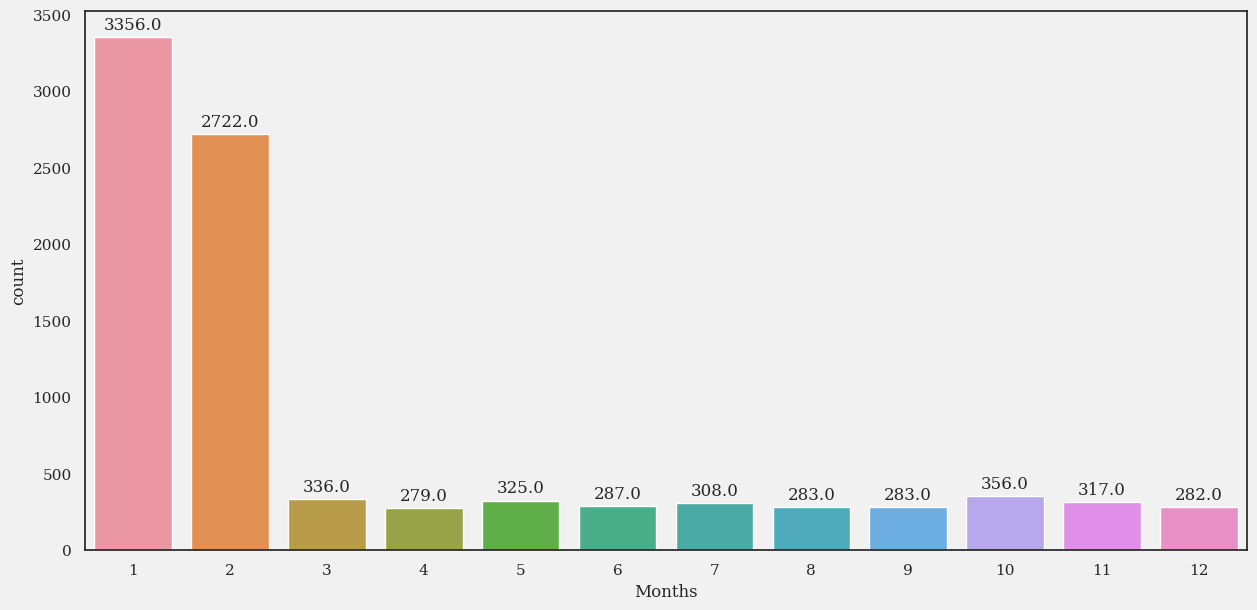

In [38]:
plt.figure(figsize=(15,7))
ax=sns.countplot(x=df['Months'], data=df);
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height + 50, height,ha='center')

January and February is the highest the date that an agreement or transaction between or among customer and An Auto Insurance company

#  HeatMap

In [39]:
heatmap = df[['CLV', 'Income', 'Monthly Premium Auto','Total Claim Amount']]

<Axes: >

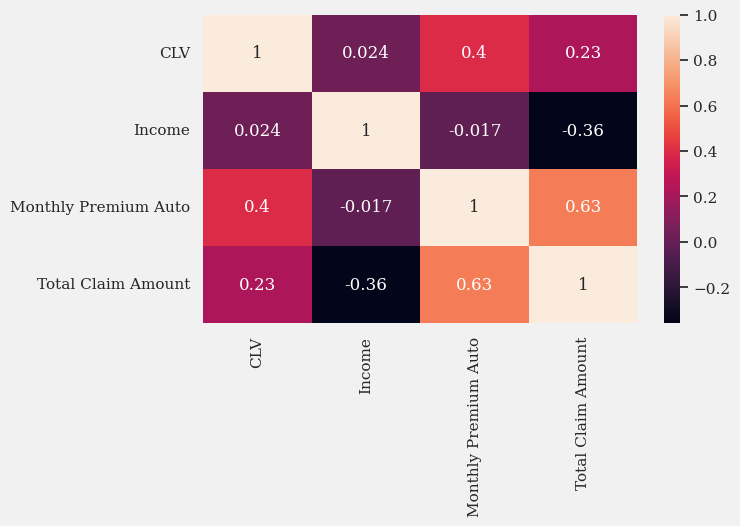

In [40]:
plt.figure(figsize=(7,4))
sns.heatmap(heatmap.corr(),annot=True)

We can clearly see in the heatmap, that customer lifetime value has a better correlation with monthly premium auto and acceptable correlation with total claim amount.

# Statistical Significance

In [41]:
# H0:The null hypothesis of the test is the data is normally distributed
# HA:The data is not normally distributed

In [42]:
import scipy.stats as stats
stats.shapiro(df['CLV'])

ShapiroResult(statistic=0.7033725380897522, pvalue=0.0)

p-value less than 0.05 we reject null hypothesis the data is not normally distributed

We will proceed with non parametric tests since the dependent variable is not normally distributed

In [43]:
columns_cat = list(cat_cols.columns)
columns_cat

['State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size']

In [44]:
manwhiteneyy = []
anova = []

for i in columns_cat:
    if (df[i].nunique()>2):
        anova.append(i)
    else:
        manwhiteneyy.append(i)
print("Anova:",anova)
print("TTest:",manwhiteneyy)

Anova: ['State', 'Coverage', 'Education', 'EmploymentStatus', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']
TTest: ['Response', 'Gender']


In [45]:
# H0: the distributions of both populations are equal
# Ha: that the distributions are not equal.

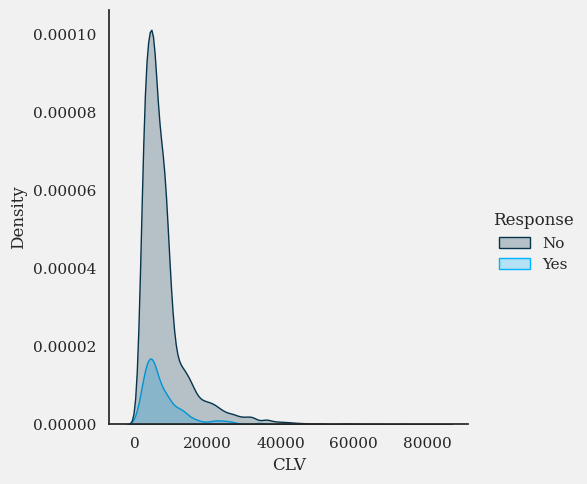

In [46]:
sns.displot(df, x="CLV", hue="Response", kind="kde", fill=True)

Customer with No Response are Higher than Yes Response

If the distributions are identical, which is the null hypothesis of the Mann-Whitney U test, the mean rank will be the same

In [47]:
yes=df[df['Response']=='No']['CLV']
no=df[df['Response']=='Yes']['CLV']

In [48]:
f = stats.mannwhitneyu(yes,no)
print(f)

MannwhitneyuResult(statistic=5175420.0, pvalue=0.5168872245291198)


p-value is greater than 0.05 we failed to reject null hypothesis i.e the mean rank will be the same for both males and females.

In [49]:
male=df[df['Gender']=='M']['CLV']
female=df[df['Gender']=='F']['CLV']

In [50]:
b =stats.mannwhitneyu(male,female)
print(b)

MannwhitneyuResult(statistic=10337134.0, pvalue=0.48749303056449833)


p-value is greater than 0.05 we failed to reject null hypothesis i.e the mean rank will be the same for both males and females.

H0:the mean ranks of the groups are the same.
H1:the mean ranks of the groups are not the same.

In [51]:
ca=df[df['State']=='California']['CLV']
Or=df[df['State']=='Oregon']['CLV']
Ar=df[df['State']=='Arizona']['CLV']
Ne=df[df['State']=='Nevada']['CLV']
Wa=df[df['State']=='Washington']['CLV']

In [52]:
a = stats.kruskal(ca,Or,Ar,Ne,Wa)
print(a)

KruskalResult(statistic=5.072069583836472, pvalue=0.27998232358818953)


p-value > 0.05 failed to reject H0

In [53]:
stats.f_oneway(ca,Or,Ar,Ne,Wa)
print(b)

MannwhitneyuResult(statistic=10337134.0, pvalue=0.48749303056449833)


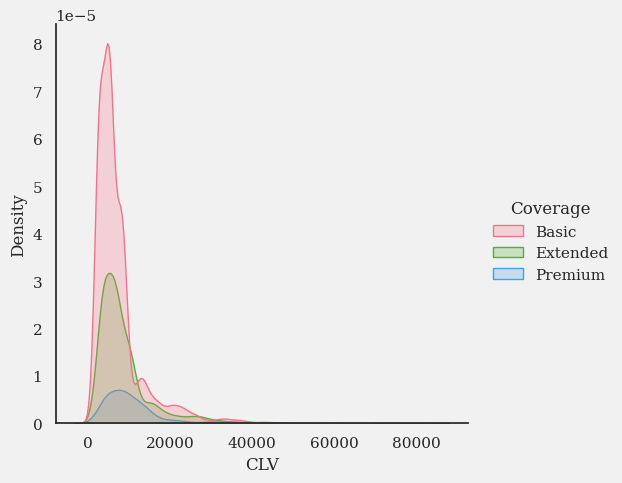

In [54]:
sns.displot(df, x="CLV", hue="Coverage", kind="kde", fill=True)

In [55]:
Ba=df[df['Coverage']=='Basic']['CLV']
Ex=df[df['Coverage']=='Extended']['CLV']
Pr=df[df['Coverage']=='Premium']['CLV']

In [56]:
c =stats.kruskal(Ba,Ex,Pr)
print(c)

KruskalResult(statistic=502.4996090762843, pvalue=7.648852917746348e-110)


In [57]:
stats.f_oneway(Ba,Ex,Pr)

F_onewayResult(statistic=133.67511419504905, pvalue=6.0158970099807e-58)

In [58]:
Ba=df[df['Education']=='Bachelor']['CLV']
Co=df[df['Education']=='College']['CLV']
Hi=df[df['Education']=='High School or Below']['CLV']
Ma=df[df['Education']=='Master']['CLV']
Da=df[df['Education']=='Doctor']['CLV']

In [59]:
d= stats.kruskal(Ba,Co,Hi,Ma,Da)
print(d)

KruskalResult(statistic=12.234061758188824, pvalue=0.015693004298603028)


<Figure size 1300x500 with 0 Axes>

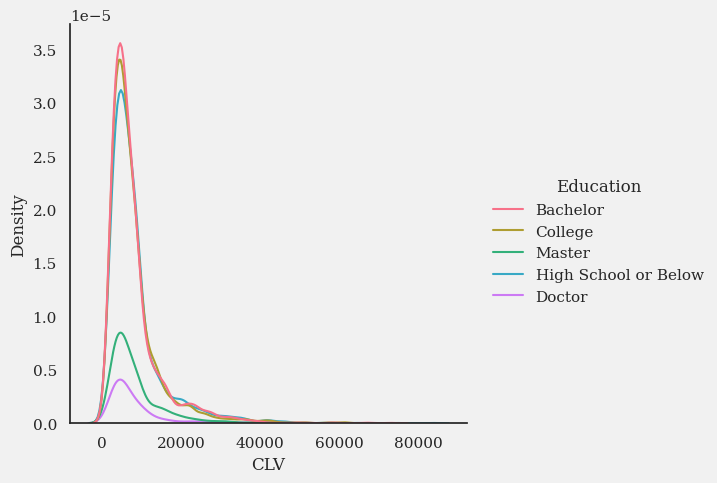

In [60]:
plt.figure(figsize=(13,5))
sns.displot(df, x="CLV", hue="Education", kind="kde", fill=False)

In [61]:
# use LabelEncoder() to encode other categorical columns:
from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
    le = LabelEncoder()
    le.fit(cat_cols[col])
    cat_cols[col] = le.transform(cat_cols[col])
cat_cols.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,4,0,0,0,1,0,1,1,0,2,0,0,5,1
1,0,0,1,0,4,0,1,2,1,5,2,0,0,1
2,2,0,2,0,1,0,1,1,1,5,0,0,5,1
3,1,0,0,0,4,1,1,1,0,1,0,2,3,1
4,4,0,0,0,1,1,0,2,1,3,0,0,0,1


In [62]:
dfn = pd.concat([numerical_cols,cat_cols],axis=1)
dfn.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State,Response,...,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,2763.519279,56274,69,32,5,0,1,384.811147,4,0,...,1,0,1,1,0,2,0,0,5,1
1,6979.535903,0,94,13,42,0,8,1131.464935,0,0,...,4,0,1,2,1,5,2,0,0,1
2,12887.431650,48767,108,18,38,0,2,566.472247,2,0,...,1,0,1,1,1,5,0,0,5,1
3,7645.861827,0,106,18,65,0,7,529.881344,1,0,...,4,1,1,1,0,1,0,2,3,1
4,2813.692575,43836,73,12,44,0,1,138.130879,4,0,...,1,1,0,2,1,3,0,0,0,1


In [63]:
import statsmodels.api as sm

In [64]:
X=dfn.drop(['CLV'],axis=1)
y=dfn['CLV']
X_constant=sm.add_constant(X)
lin_reg=sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CLV   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     85.81
Date:                Mon, 30 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:21:59   Log-Likelihood:                -92835.
No. Observations:                9134   AIC:                         1.857e+05
Df Residuals:                    9112   BIC:                         1.859e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           531.5725    473.375      1.123      0.261    -396.349    1459.494
Income                            0.0022      0.003      0.669      0.504      -0.004       0.009
Monthly Premium Auto             82.6770      2.925     28.270      0.000      76.944      88.410
Months Since Last Claim           6.7966      6.546      1.038      0.299      -6.036      19.629
Months Since Policy Inception    -0.7811      2.373     -0.329      0.742      -5.433       3.871
Number of Open Complaints      -247.8781     72.360     -3.426      0.001    -389.719    -106.037
Number of Policies               63.2701     27.663      2.287      0.022       9.044     117.496
Total Claim Amount               -0.5824      0.362     -1.609      0.108      -1.292       0.127
State                            28.4756     51.117      0.557      0.577     -71.726     128.677
Response                       -448.3788    192.408     -2.330      0.020    -825.541     -71.217
Coverage                       -183.7890    113.701     -1.616      0.106    -406.669      39.091
Education                        93.0832     47.790      1.948      0.051      -0.597     186.763
EmploymentStatus               -106.4348     73.604     -1.446      0.148    -250.715      37.845
Gender                         -144.5589    132.636     -1.090      0.276    -404.556     115.438
Location Code                   103.5590    116.578      0.888      0.374    -124.961     332.079
Marital Status                 -237.2764    110.660     -2.144      0.032    -454.195     -20.358
Policy Type                     448.5882    291.059      1.541      0.123    -121.953    1019.130
Policy                          -47.9853     86.264     -0.556      0.578    -217.082     121.112
Renew Offer Type               -348.5079     68.493     -5.088      0.000    -482.770    -214.245
Sales Channel                    23.5601     62.295      0.378      0.705     -98.551     145.672
Vehicle Class                    46.4930     32.422      1.434      0.152     -17.060     110.047
Vehicle Size                    186.6798    123.372      1.513      0.130     -55.157     428.517
==============================================================================
Omnibus:                     5665.297   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64590.396
Skew:                           2.852   Prob(JB):                         0.00
Kurtosis:                      14.713   Cond. No.                     3.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.54e+05. This might ind

# Assumptions

Assumption 1 No Auto correlation.

Test needed : Durbin- Watson Test.

It's value ranges from 0-4. If the value of Durbin- Watson is Between 0-2, it's known as Positive Autocorrelation. If the value ranges from 2-4, it is known as Negative autocorrelation. If the value is exactly 2, it means No Autocorrelation. For a good linear model, it should have low or no autocorrelation. we can see here the values of dublin watson test: 1.995 (No AUTO-CORRELATION)

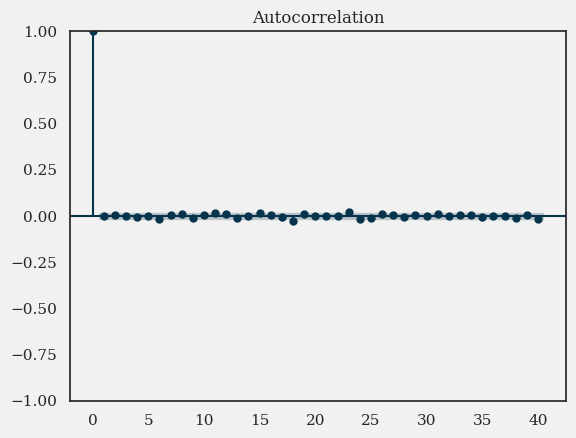

In [65]:
import statsmodels.tsa.api as smt #timeseries analysis

acf = smt.graphics.plot_acf(lin_reg.resid, lags=40 , alpha=0.05)#auto_correlation value, lags= previous value
acf.show()

From the graph above, we can easily see that there is no autocorrelation.

# Assumption 2- Normality of Residuals

The second assumption is the Normality of Residuals / Error terms. For this we prefer the Jarque Bera test. For a good model, the residuals should be normally distributed. The higher the value of Jarque Bera test , the lesser the residuals are normally distributed. We generally prefer a lower value of jarque bera test.

The Jarque–Bera test is a goodness-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution. A large value for the jarque-bera test indicates non normality.

The jarque bera test tests whether the sample data has the skewness and kurtosis matching a normal distribution. Note that this test generally works good for large enough number of data samples(>2000) as the test statistics asymptotically has a chi squared distribution with degrees 2 of freedom.

In [66]:
from scipy import stats
print(stats.jarque_bera(lin_reg.resid))

SignificanceResult(statistic=64590.39584240362, pvalue=0.0)


The critical chi square value at the 5% level of significance is 5.99. If the computed value exceeds this value the null hypothesis is rejected. In this case the computed value of the JB statistic 65051.11 is greater than 5.99. Thus we reject the null hypothesis that the error terms are normally distributed.

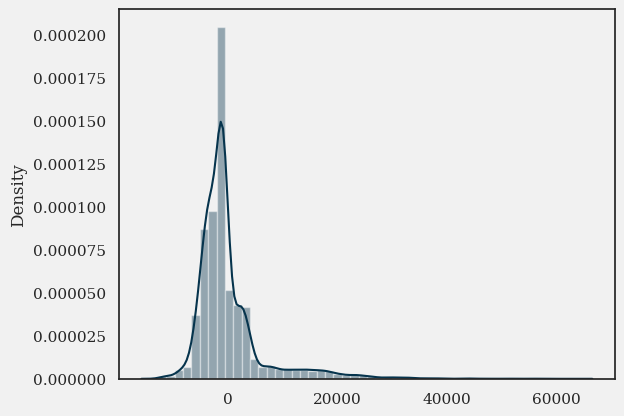

In [67]:
import seaborn as sns

sns.distplot(lin_reg.resid)
plt.show()

From the graph we infer that due to the high value of Jarque Bera test, only few residuals are normally distributed

# Asssumption 3 - Linearity of residuals


Here we have 2 options. Either we can plot the observed values Vs predicted values and plot the Residual Vs predicted values and see the linearity of residuals. OR We can go for rainbow test. Let's look both of them one by one.

In [68]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)#the fraction of the data to include in the center model

(1.0148228623095228, 0.30976069915060367)

 H0:The data is linear, pvalue > 0.05 failed to reject H0, here we failed to reject H0 so residuals are normally distributed

In [69]:
lin_reg.resid.mean()

1.662060045780957e-09

# Assumption 4 - Homoscedasticity_test(using goldfeld test) OR (Beusch-Wagon Test)

Homoscedacity :: If the variance of the residuals are symetrically distributed across the regression line , then the data is said to homoscedastic.

Heteroscedacity :: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

This test is based on the hytpothesis testing where null and alternate hypothesis are:

𝐻0: 𝜎𝑢𝑖 𝑖𝑠 𝑐𝑜𝑛𝑠𝑡𝑎𝑛𝑡 𝑎𝑐𝑟𝑜𝑠𝑠 𝑡ℎ𝑒 𝑟𝑎𝑛𝑔𝑒 𝑜𝑓 𝑑𝑎𝑡𝑎

𝐻𝑎: 𝜎𝑢𝑖 𝑖𝑠 𝑛𝑜𝑡 𝑐𝑜𝑛𝑠𝑡𝑎𝑛𝑡 𝑎𝑐𝑟𝑜𝑠𝑠 𝑡ℎ𝑒 𝑟𝑎𝑛𝑔𝑒 𝑜𝑓 𝑑𝑎𝑡𝑎 The residuals should be homoscedastic.

Goldfeld Test

In [70]:
import statsmodels.stats.api as sms

In [71]:
name=['F-statistic','p-value']
test=sms.het_goldfeldquandt(lin_reg.resid,lin_reg.model.exog)

test

(1.2292534429860835, 1.812387097226792e-12, 'increasing')

p-value below a certain level (like 0.05) indicates we should reject the null in favor of heteroscedasticity.

# Assumption 5- NO MULTI COLLINEARITY

The interpretation of VIF is as follows: the square root of a given variable’s VIF shows how much larger the standard error is, compared with what it would be if that predictor were uncorrelated with the other features in the model. If no features are correlated, then all values for VIF will be 1.

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns)

,vif
Income,2.262285
Monthly Premium Auto,2.340932
Months Since Last Claim,1.005291
Months Since Policy Inception,1.014031
Number of Open Complaints,1.003197
Number of Policies,1.010664
Total Claim Amount,2.556664
State,1.001755
Response,1.050177
Coverage,1.285413


We can see that there is high VIF in column Policy & policy type Also we have seen in statistical approach these veriables are not significant to predict target hence from above 2 conclusion we can remove them

In [73]:
from sklearn.model_selection import train_test_split
X=dfn.drop(['CLV','Policy Type','Policy', 'Income'],axis=1)
y=dfn['CLV']          
y =np.log(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [74]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6393, 18)
(6393,)
(2741, 18)
(2741,)


# Model Building

Linear Regression

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
lr = LinearRegression()
model = lr.fit(X_train,y_train)
print(f'R^2 score for train: {lr.score(X_train, y_train)}')
print(f'R^2 score for test: {lr.score(X_test, y_test)}')

R^2 score for train: 0.24943939758879652
R^2 score for test: 0.24493194727949752


In [77]:
y_pred = model.predict(X_test)

In [78]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [79]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 

RMSE: 0.5810569590913652
MAE 0.44954458181019175
R-squared: 0.24493194727949752


In [80]:
#Feature Selection by Recursive Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X = X[cols]
    Xc = sm.add_constant(X)
    model = sm.OLS(y,Xc).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features = cols
print(selected_features)

['Monthly Premium Auto', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount', 'Response', 'Coverage', 'Education', 'EmploymentStatus', 'Marital Status', 'Renew Offer Type', 'Vehicle Class']


In [81]:
X_new = X[['Monthly Premium Auto', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount', 'Response', 'EmploymentStatus', 'Renew Offer Type']]

In [82]:
X_constant_new=sm.add_constant(X_new)
lin_reg=sm.OLS(y,X_constant_new).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CLV   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     425.7
Date:                Mon, 30 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:23:27   Log-Likelihood:                -7775.7
No. Observations:                9134   AIC:                         1.557e+04
Df Residuals:                    9126   BIC:                         1.562e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         7.9046      0.023    339.466      0.000       7.859       7.950
Monthly Premium Auto          0.0088      0.000     38.020      0.000       0.008       0.009
Number of Open Complaints    -0.0302      0.007     -4.623      0.000      -0.043      -0.017
Number of Policies            0.0534      0.002     21.440      0.000       0.049       0.058
Total Claim Amount        -8.297e-05   2.91e-05     -2.854      0.004      -0.000    -2.6e-05
Response                     -0.0338      0.017     -1.966      0.049      -0.068   -9.55e-05
EmploymentStatus             -0.0245      0.005     -5.009      0.000      -0.034      -0.015
Renew Offer Type             -0.0407      0.006     -6.718      0.000      -0.053      -0.029
==============================================================================
Omnibus:                     1443.426   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2222.628
Skew:                           1.146   Prob(JB):                         0.00
Kurtosis:                       3.768   Cond. No.                     2.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Rigde and Lasso Regression

In [83]:
from sklearn.linear_model import Ridge, Lasso

In [84]:
ridge=Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
print('Ridge Regression')
y_pred = ridge.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:',r2_score(y_test,y_pred)) 

Ridge Regression
RMSE: 0.5810567225422177
R-squared: 0.24493256205801472


In [85]:
lasso = Lasso(random_state=1)
lasso.fit(X_train,y_train)
print('Lasso Regression')
y_pred = lasso.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:',r2_score(y_test,y_pred)) 

Lasso Regression
RMSE: 0.5996258438178985
R-squared: 0.19590128726865752


# Decision Tree

In [86]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=1)

dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 

RMSE: 0.2656452031418602
MAE 0.10500889165854282
R-squared: 0.8421834163245249


In [87]:
from sklearn.model_selection import train_test_split
X=dfn.drop(['CLV','Policy Type','Policy', 'Income'],axis=1)
y=np.log(dfn['CLV'])         
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

# RandomForest

In [88]:
from sklearn.ensemble import RandomForestRegressor

In [89]:
rf = RandomForestRegressor(random_state=1)

rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 

RMSE: 0.1948793278964689
MAE 0.0896495731753599
R-squared: 0.9150662640026651


# Hyperparameter tuning of random forest

In [94]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()
params = {
        'max_depth' : [10,20,30],
        
        'n_estimators' : [100,200,50],
        
        "bootstrap" : [True, False],
    
        'max_features': ['auto', 'sqrt', 'log2']
        
        }

grid = GridSearchCV(estimator = rf, param_grid=params, cv = 5, n_jobs = -1, return_train_score = True )
grid.fit(X,y)
grid.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 200}

In [95]:
rf = RandomForestRegressor(**grid.best_params_)

rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 0.19581178491329967
MAE 0.09004045352364948
R-squared: 0.9142515390169859


In [96]:
from sklearn.ensemble import AdaBoostRegressor

In [97]:
adaboost = AdaBoostRegressor(
    RandomForestRegressor(max_depth=5),
    n_estimators=150
)
adaboost.fit(X_train, y_train)

AdaBoostRegressor(estimator=RandomForestRegressor(max_depth=5),
                  n_estimators=150)

In [98]:
y_pred = adaboost.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 0.2188915910072236
MAE 0.13053350144070078
R-squared: 0.8928463824832075


In [99]:
pd.DataFrame(rf.feature_importances_,index=X.columns,columns=['Score']).sort_values("Score",ascending=False)[:10]

,Score
Number of Policies,0.673498
Monthly Premium Auto,0.232076
Total Claim Amount,0.016894
Months Since Policy Inception,0.015111
Months Since Last Claim,0.013936
EmploymentStatus,0.007863
Education,0.005309
State,0.004437
Sales Channel,0.004424
Coverage,0.004057


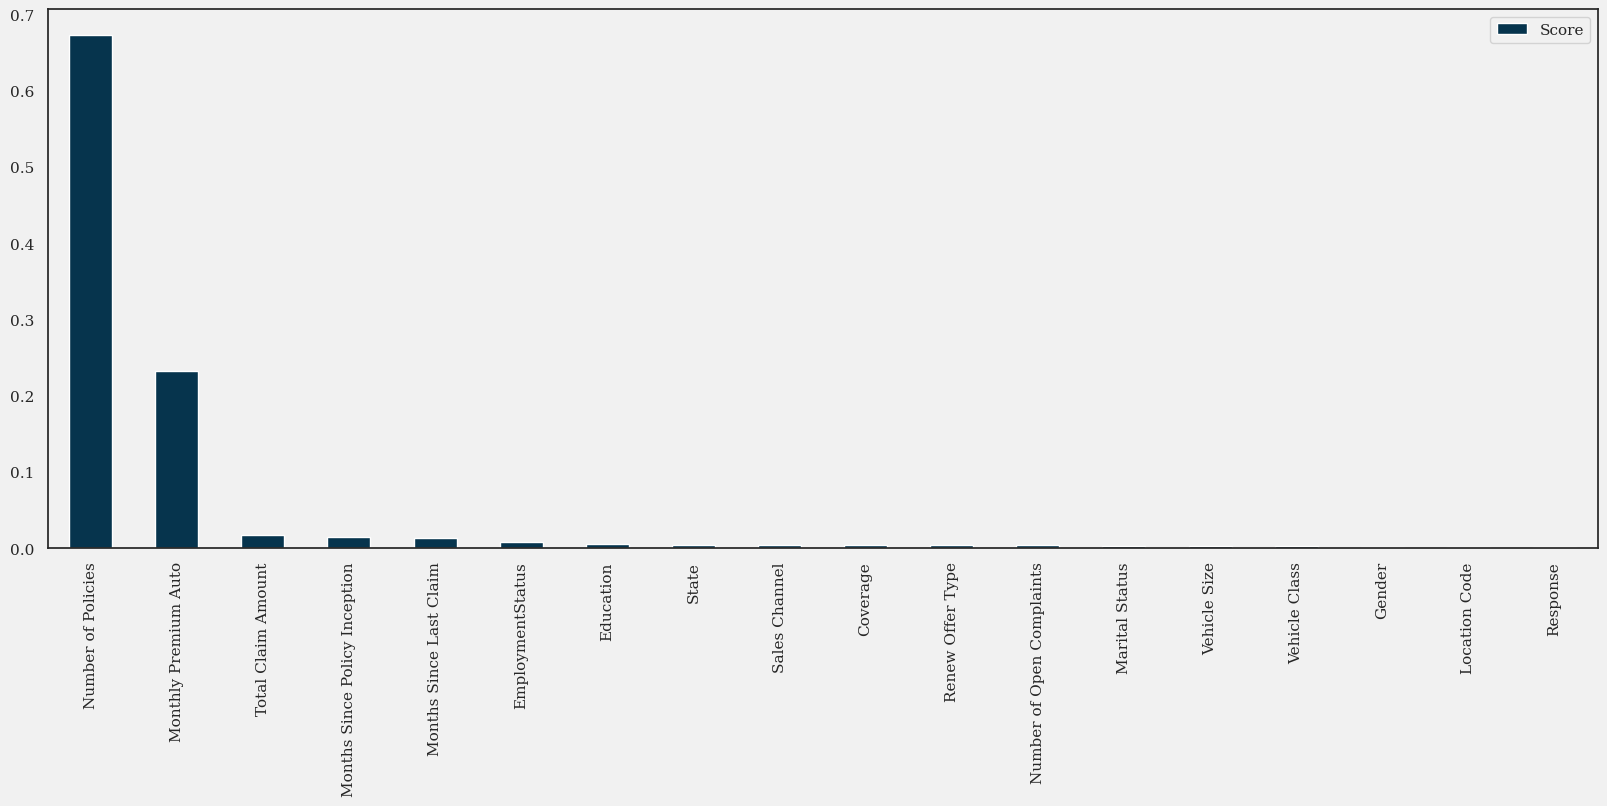

In [100]:
pd.DataFrame(rf.feature_importances_,index=X.columns,columns=['Score']).sort_values("Score",ascending=False).plot(kind='bar',figsize=(20,7))
plt.show()

Random Forest Model with hyperparameter tuning using GridSearchCV gave the best RMSE and R^2 score

Number of Policies and Monthly Premium Auto are the most important features in predicting CLV

#  Final Model

By comparing RMSE and R^2 score results of models and then we choose the best model as the Random Forest without GridSearchCV, having the best evaluation scores.

# Conclusion

Overall we can see that No of policies, Monthly Premium auto, Total Claim amount, Months Since Policy Inception, Income , Months Since Last Claim, Number of Open Complaints, Coverage_Extended,vEmploymentStatus_Employed and Renew Offer Type_Offer2 are the important features in predicting the Customer Lifetime Value.


The customers having more number of policies with high monthly premium will add more value to company.


Ironically being an auto insurance company, the type of vehicle or size does not have an impact on the CLV prediction.


The insurance agents should start increasing their policy advertisement for the customers who have more no. of policies, which is the major feature in predicting the CLV.